In [1]:
import numpy as np

We consider the function $h:\mathbb{R}\to\mathbb{R}$, that is strictly unimodal in $[\ell,u]$. It means that it has a unique global minimum $\alpha^*$ in $[\ell,u]$ and the following conditions are verified: 


- $f(\alpha_1) > f(\alpha_2) > f(\alpha^*)$ for each $\alpha_1$, $\alpha_2$ such that $\alpha_1<\alpha_2<\alpha_*$,
- $f(\alpha_2) > f(\alpha_1) > f(\alpha^*)$ for each $\alpha_1$, $\alpha_2$ such that $\alpha_2>\alpha_1>\alpha_*$.

In [2]:
def goldenSection(h, l, u, eps):
    """ 
    :param h: function that returns the value of h
    :type fct: f = h(x)
    
    :param l: lower bound of the interval
    :type l: float

    :param u: upper bound of the interval
    :type u: float
    
    :param eps: required precision
    :type eps: float
    
    :return: alphastar, iters, where alphastar is the global optimum if h is strictly unimodal and a 
             local optimum otherwise, and iters contains the detsails of each iteration. 
    :rtype: float
    """
 
    rho = (3.0 - np.sqrt(5.0)) / 2.0
    alpha1 = l + rho * (u - l)
    alpha2 = u - rho * (u - l)
    h1 = h(alpha1) 
    h2 = h(alpha2) 
    iters = list()
    iters.append([l, alpha1, alpha2, u, h1, h2])
    k = 1
    while (u - l) > eps:
        if h1 == h2:
            l = alpha1
            u = alpha2 
            alpha1 = l + rho * (u - l)
            h1 = h(alpha1)
            alpha2 = u - rho * (u - l)
            h2 = h(alpha2) ;
        elif h1 > h2:
            l = alpha1
            alpha1 = alpha2
            h1 = h2
            alpha2 = u - rho * (u - l)
            h2 = h(alpha2)
        else:
            u = alpha2
            alpha2 = alpha1
            h2 = h1
            alpha1 = l + rho * (u - l)
            h1 = h(alpha1)
        k += 1
        iters.append([l, alpha1, alpha2, u, h1, h2])
    xstar = (l + u) / 2.0
    return xstar,iters

Consider the function \\[h(x)=(2+x) \cos(2+x).\\]
The function is strictly unimodular in the interval $[5,10]$. We apply the golden section algorithm with $\varepsilon=10^{-3}$ to identify the global minimum of $h$ in this interval.

In [3]:
def h(x):
    return (2.0+x)*np.cos(2.0+x)

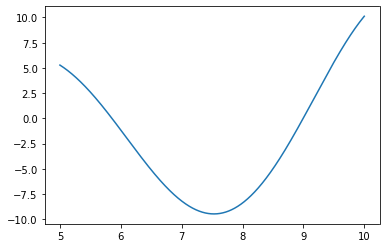

In [4]:
import matplotlib.pyplot as plt
xrange = np.arange(5.0, 10.0, 0.001)
p = plt.plot(xrange, h(xrange))

In [5]:
xstar, iters = goldenSection(h,5,10,1.0e-3)
print(f'The optimal solution is {xstar} and there are {len(iters)} iterations.')

The optimal solution is 7.5293254974342965 and there are 19 iterations.


The intervals generated during the first iterations are represented in the Figure below.

In [6]:
def plotIters(lb, ub, iters, nbr = 10):
    plt.xlim(lb, ub)
    for k in range(nbr):
        l = iters[k][0]
        u = iters[k][3]
        plt.plot([l, u], [nbr - k / 2, nbr - k / 2])   
    plt.tick_params(
        axis='y',          
        left=False,        
        labelleft = False)      
    plt.show() 

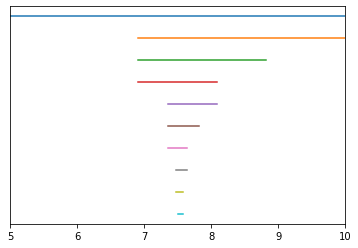

In [7]:
plotIters(5, 10, iters)

Consider now the interval $[0,8]$. The function is *not* strictly unimodal in this interval.

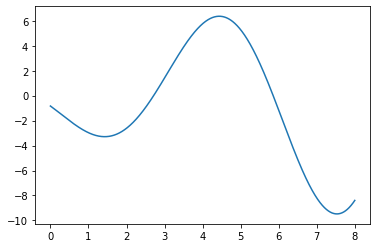

In [8]:
xrange = np.arange(0.0, 8, 0.001)
p = plt.plot(xrange, h(xrange))

If we apply the algorithm, we find a local optimum. 

In [9]:
xstar, iters = goldenSection(h,0,8,1.0e-3)
print(f'The optimal solution is {xstar} and there are {len(iters)} iterations.')

The optimal solution is 1.4255516547724514 and there are 20 iterations.


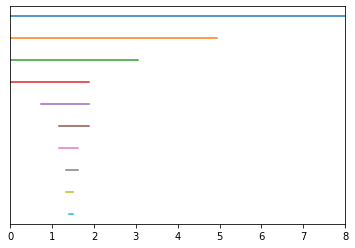

In [10]:
plotIters(0, 8, iters)